# Classification

### Loading Libraries

In [2]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib .pyplot import subplots

# StatsModel
import statsmodels .api as sm

# Scikit-Learn
from sklearn. discriminant_analysis import \
( LinearDiscriminantAnalysis as LDA ,
QuadraticDiscriminantAnalysis as QDA)
from sklearn. naive_bayes import GaussianNB
from sklearn. preprocessing import StandardScaler
from sklearn. neighbors import KNeighborsClassifier
from sklearn. linear_model import LogisticRegression
from sklearn. model_selection import train_test_split

In [3]:
# Custom Libraries
from ISLP import load_data
from ISLP import confusion_table
from ISLP.models import contrast
from ISLP.models import ( ModelSpec as MS ,
summarize )

## Logistic Regression, LDA, QDA, & KNN

### The Stock Market Data

In [78]:
Smarket = load_data ('Smarket')

Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [79]:
# Checking column's Name
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [80]:
# Smarket.corr()

corr = Smarket.drop(columns="Direction").corr()

print(corr)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000  


In [81]:
Smarket2 = Smarket.copy()
Smarket2["Direction"] = Smarket2["Direction"].map({"Down": 0, "Up": 1})

corr = Smarket2.corr(numeric_only=True)
print(corr)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000  


In [82]:
Smarket2.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095,0.074608
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Direction,0.074608,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


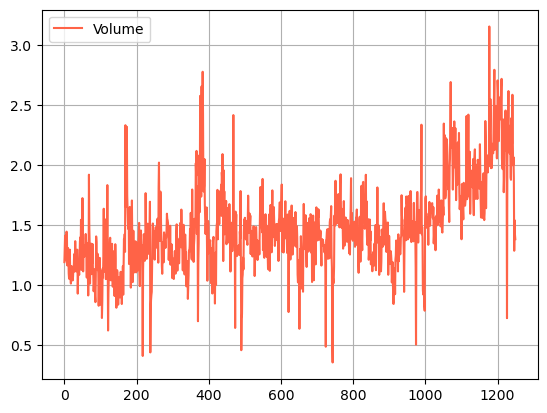

In [83]:
Smarket2.plot(y='Volume', color="tomato");
plt.grid(True)
plt.show()

### Logistic Regression

In [84]:
allvars = Smarket2.columns.drop (['Today', 'Direction', 'Year'])

design = MS(allvars)

X = design. fit_transform (Smarket)
y = Smarket. Direction == 'Up'

glm = sm.GLM(y,
             X,
             family=sm. families . Binomial ())

results = glm.fit ()
summarize (results)

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [85]:
results.params

intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [86]:
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [87]:
probs = results.predict()
probs [:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [88]:
labels = np.array (['Down']*1250)

labels[probs >0.5] = "Up"

In [89]:
confusion_table(labels, Smarket.Direction )

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [90]:
(507+145) /1250, np.mean(labels == Smarket. Direction )

(0.5216, np.float64(0.5216))

In [91]:
train = (Smarket2.Year < 2005)

Smarket_train = Smarket2.loc[train]
Smarket_test = Smarket2.loc[~train]

Smarket_test.shape

(252, 9)

In [92]:
X_train , X_test = X.loc[train], X.loc[~train]

y_train , y_test = y.loc[train], y.loc[~train]

glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm. families . Binomial ())

results = glm_train.fit()
probs = results.predict(exog=X_test)

In [93]:
D = Smarket2.Direction

L_train , L_test = D.loc[train], D.loc[~train]

In [94]:
# labels = np.array (['Down']*252)

# labels[probs >0.5] = 'Up'

# confusion_table(labels, L_test)

In [95]:
from ISLP import confusion_table

# Predicciones a strings
pred_str = np.where(probs > 0.5, 'Up', 'Down')

# Verdaderas a strings sin NaN (cubre 0/1, '0'/'1', y ya 'Up'/'Down')
map_dict = {0: 'Down', 1: 'Up', '0': 'Down', '1': 'Up', 'Down': 'Down', 'Up': 'Up'}
true_str = pd.Series(L_test).map(map_dict)

# Alinear y eliminar pares con NaN (por si quedó alguno)
df_eval = pd.DataFrame({'pred': pred_str, 'true': true_str}).dropna()

# Matriz de confusión y accuracy
cm = confusion_table(df_eval['pred'], df_eval['true'], labels=['Down', 'Up'])
acc = (df_eval['pred'].to_numpy() == df_eval['true'].to_numpy()).mean()

print(cm)
print("Accuracy:", acc)

Truth      Down  Up
Predicted          
Down         77  97
Up           34  44
Accuracy: 0.4801587301587302


In [98]:
# Accuracy

labels = labels[:len(L_test.values)]  # Truncate labels to match L_test.values length

# Option 2: If they should be the same size but might be shaped differently
labels = labels.reshape(-1)  # Flatten to 1D array
L_test_values = L_test.values.reshape(-1)  # Flatten to 1D array

print("Accuracy:", (labels == L_test_values).mean())

Accuracy: 0.0


In [99]:
model = MS(['Lag1', 'Lag2']).fit(Smarket2)

X = model. transform(Smarket2)
X_train , X_test = X.loc[train], X.loc[~train]

glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())

results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array (['Down']*252)
labels[probs >0.5] = 'Up'

confusion_table (pred_str, true_str)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [100]:
(35+106) /252, 106/(106+76)

(0.5595238095238095, 0.5824175824175825)

In [101]:
newdata = pd. DataFrame ({'Lag1':[1.2 , 1.5] ,
                          'Lag2':[1.1 , -0.8]});

newX = model.transform(newdata)

results.predict(newX)

0    0.479146
1    0.496094
dtype: float64

### Linear Discriminant Analysis

In [102]:
lda = LDA( store_covariance =True)

In [103]:
X_train , X_test = [M.drop(columns =['intercept'])
                    
for M in [X_train , X_test ]]
lda.fit(X_train , L_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,True
,tol,0.0001
,covariance_estimator,None


In [104]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [105]:
lda. classes_

array([0, 1])

In [106]:
lda.priors_

array([0.49198397, 0.50801603])

In [107]:
lda. scalings_

array([[-0.64201904],
       [-0.51352928]])

In [108]:
lda_pred = lda.predict(X_test)

In [109]:
confusion_table (lda_pred, L_test)

Truth,0,1
Predicted,,
0,35,35
1,76,106


In [110]:
lda_prob = lda. predict_proba (X_test)

np.all(
    np.where( lda_prob [: ,1] >= 0.5, 'Up','Down') == lda_pred)

np.False_

In [111]:
np.all(
    [lda.classes_ [i] for i in np.argmax(lda_prob , 1)] ==
    lda_pred)

np.True_

In [112]:
np.sum(lda_prob [: ,0] > 0.9)

np.int64(0)

### Quadratic Discriminant Analysis

In [113]:
qda = QDA( store_covariance =True)

qda.fit(X_train , L_train)

,priors,None
,reg_param,0.0
,store_covariance,True
,tol,0.0001


In [114]:
qda.means_ , qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

In [115]:
qda. covariance_ [0]

array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

In [117]:
qda_pred = qda.predict(X_test)

confusion_table (qda_pred , L_test)

Truth,0,1
Predicted,,
0,30,20
1,81,121


In [118]:
np.mean( qda_pred == L_test)

np.float64(0.5992063492063492)

In [ ]:
### Naive Bayes